<a href="https://colab.research.google.com/github/manjuiitm/mlprojects/blob/main/Soilprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('DoneSoilMaxMinRainWindMaxMinRainWind (1).xlsx')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
district_name = "Ernakulam"  # Change to the desired district
district_data = df[df['District'] == district_name]
print(district_data)

       District       Date  Soil Moisture  MN  DT  MAX TEMP  MIN TEMP  WIND  \
1947  Ernakulam 2019-01-01      20.249780   1   1      33.3      20.4   6.0   
1948  Ernakulam 2019-01-02      19.831255   1   2      32.5      19.4   6.0   
1949  Ernakulam 2019-01-03      19.433846   1   3      32.1      17.3   5.0   
1950  Ernakulam 2019-01-04      19.054425   1   4      34.1      17.2   5.0   
1951  Ernakulam 2019-01-05      18.716502   1   5      33.4      16.5   5.0   
...         ...        ...            ...  ..  ..       ...       ...   ...   
3889  Ernakulam 2024-04-26      16.874467   4  26      36.8      27.4   7.0   
3890  Ernakulam 2024-04-27      16.680320   4  27      37.0      27.0   6.0   
3891  Ernakulam 2024-04-28      16.956645   4  28      36.7      27.4   7.0   
3892  Ernakulam 2024-04-29      16.964860   4  29      37.3      28.1   6.0   
3893  Ernakulam 2024-04-30      18.611763   4  30      37.1      27.7   7.0   

      RAIN Unnamed: 9  ... SL HA TH DS FG GA Unname

In [ ]:
district_data = district_data.sort_values(by='Date')

In [ ]:
district_data= district_data.sort_values(by='Date').reset_index(drop=True)

In [156]:
df = district_data.copy()


In [157]:
feature_cols = ['MAX TEMP', 'MIN TEMP', 'RAIN', 'WIND']
X_train = df[feature_cols]
y_train = df['Soil Moisture']

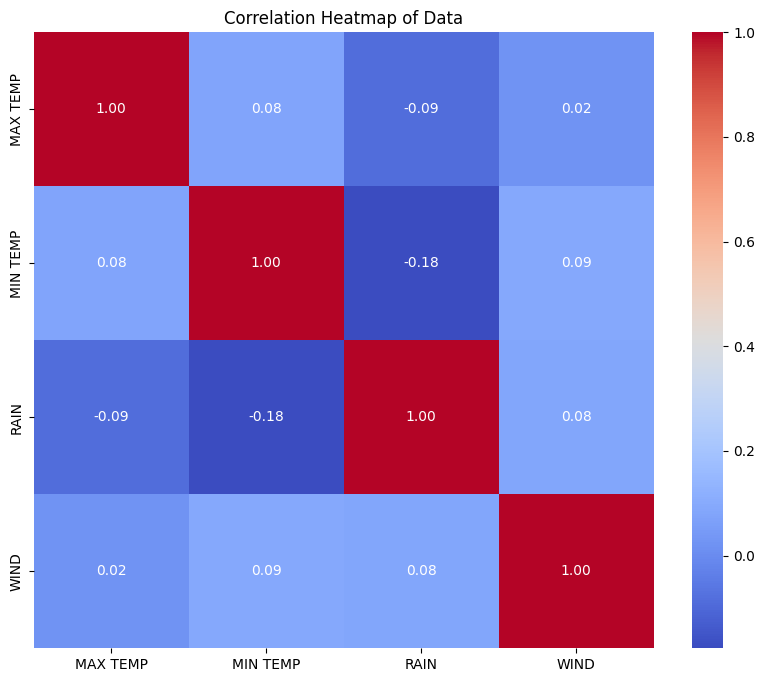

In [159]:
# Calculate the correlation matrix
correlation_matrix = df[feature_cols].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Show the plot
# Show the plot
plt.title("Correlation Heatmap of Data")
plt.show()

In [160]:
train_data = df.iloc[:-15]
val_data= df.iloc[-15:]

In [161]:
feature_cols = ['MAX TEMP', 'MIN TEMP', 'RAIN', 'WIND']
target_col = 'Soil Moisture'

train_features = train_data[feature_cols]
train_target = train_data[target_col]

val_features = val_data[feature_cols]
val_target = val_data[target_col]

Support Vector Machine:"Mean Squared Error: 8.686261579209996"
Support Vector Machine:"Root Mean Squared Error: 2.9472464401895535"
Support Vector Machine:"R^2 Score: -7.581432672024068"


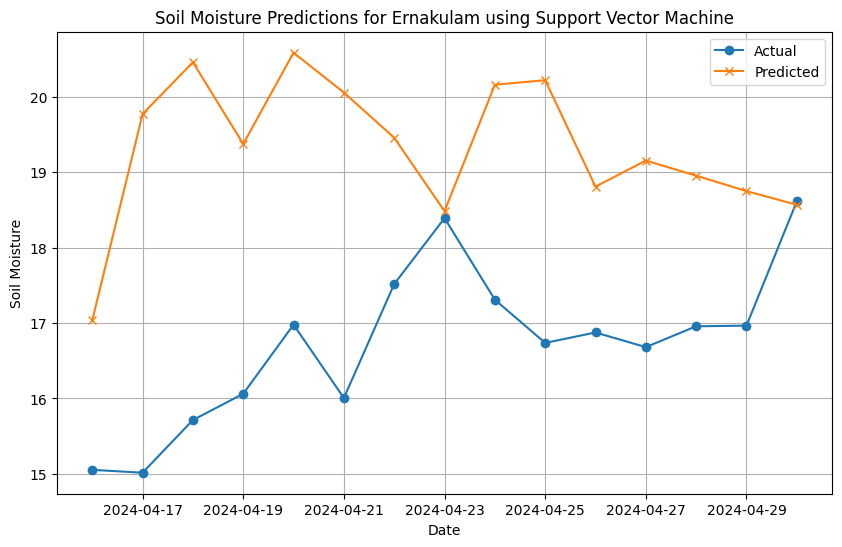

Linear Regression:"Mean Squared Error: 46.89398665214456"
Linear Regression:"Root Mean Squared Error: 6.847918417456838"
Linear Regression:"R^2 Score: -45.32805327223098"


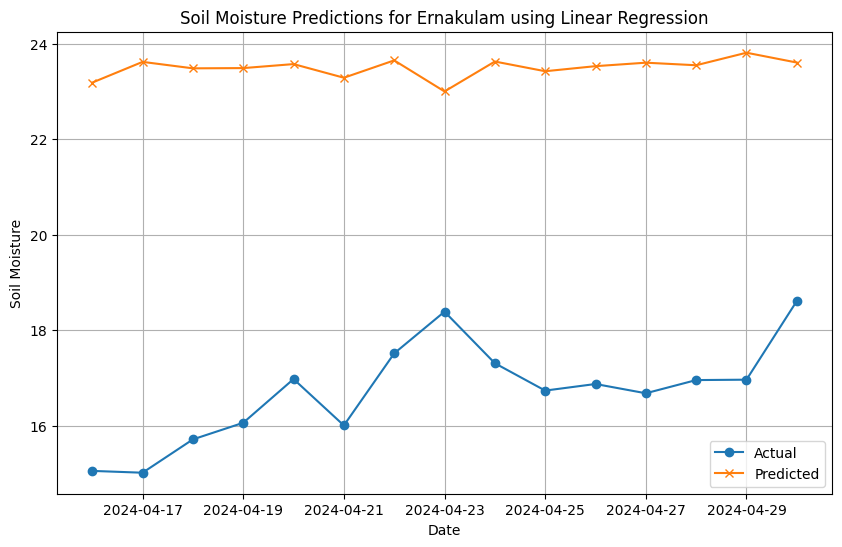

Decision Tree:"Mean Squared Error: 8.72375700879576"
Decision Tree:"Root Mean Squared Error: 2.9536006854000694"
Decision Tree:"R^2 Score: -7.618475593373452"


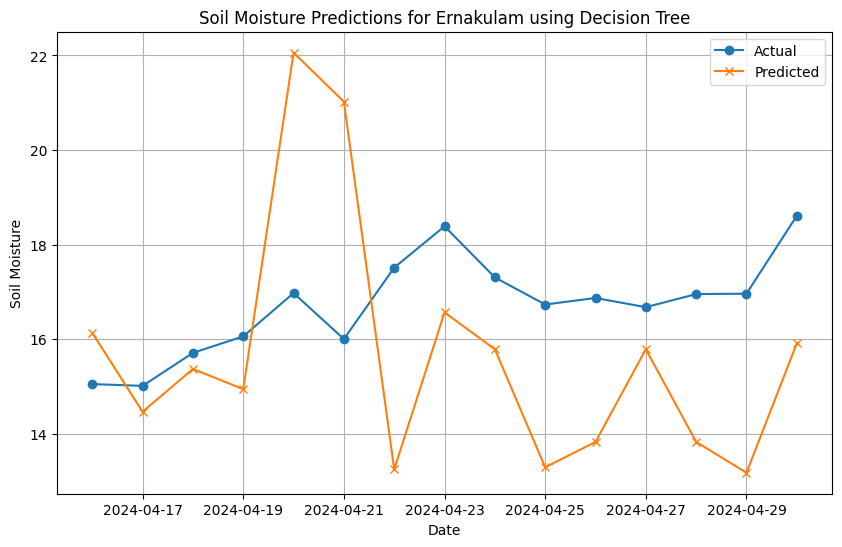

Random Forest:"Mean Squared Error: 3.9424153983839614"
Random Forest:"Root Mean Squared Error: 1.9855516609708148"
Random Forest:"R^2 Score: -2.8948369212546607"


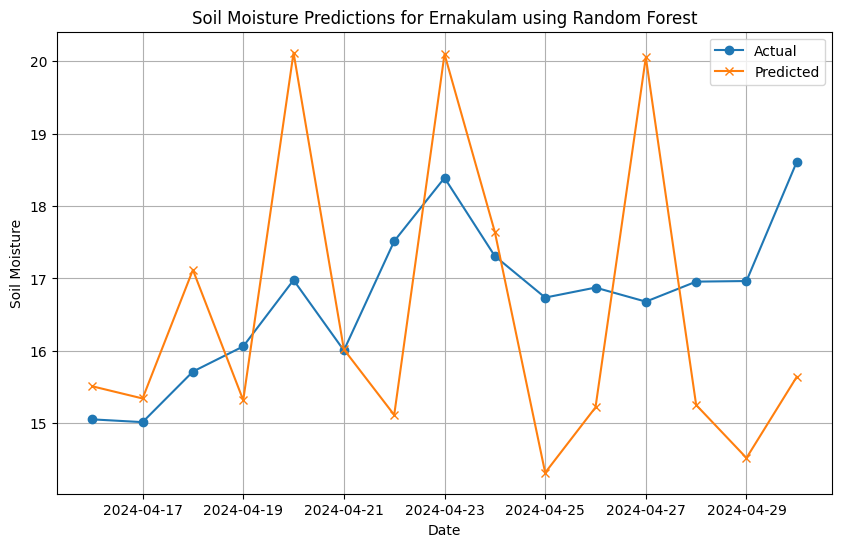

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 1932, number of used features: 4
[LightGBM] [Info] Start training from score 23.817855
LightGBM:"Mean Squared Error: 3.825019628202253"
LightGBM:"Root Mean Squared Error: 1.9557657396023311"
LightGBM:"R^2 Score: -2.778857925157428"


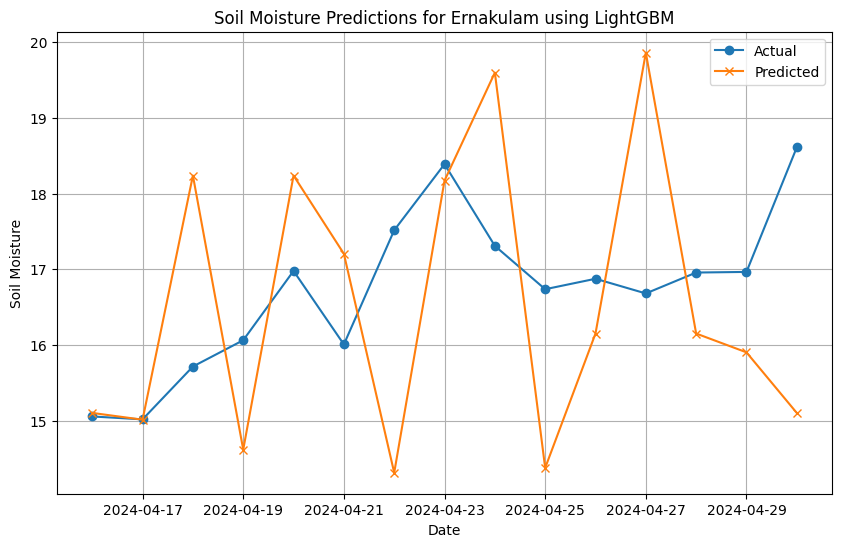

XGBoost:"Mean Squared Error: 6.3094261724780685"
XGBoost:"Root Mean Squared Error: 2.5118571162544394"
XGBoost:"R^2 Score: -5.233281763908309"


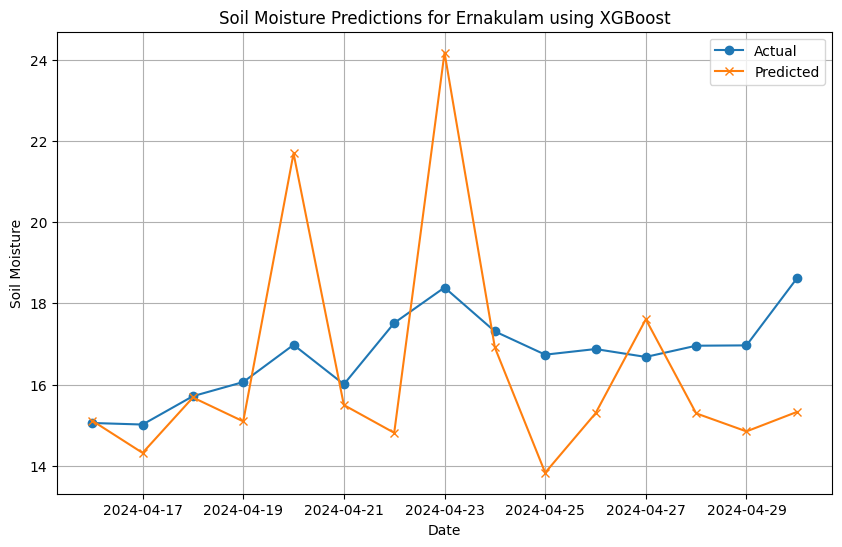

K-Nearest Neighbors:"Mean Squared Error: 3.3409777271309102"
K-Nearest Neighbors:"Root Mean Squared Error: 1.827834162918209"
K-Nearest Neighbors:"R^2 Score: -2.300657614632121"


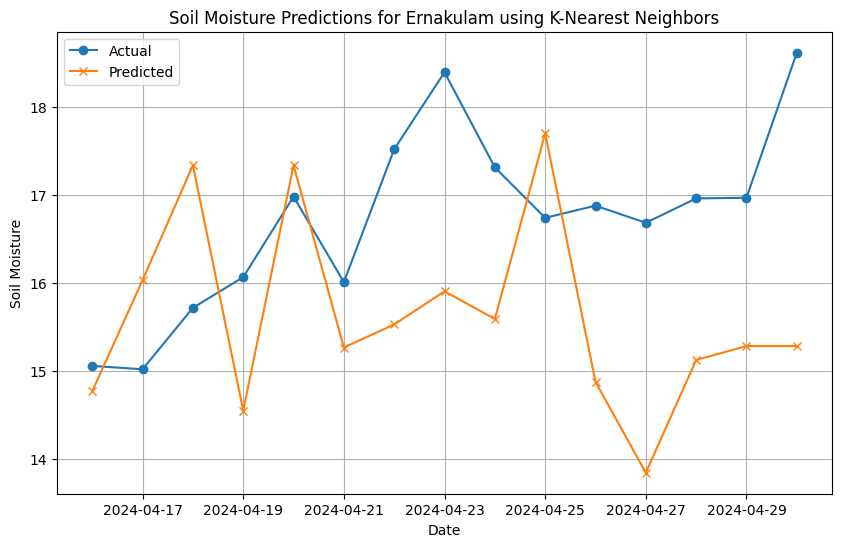

Gradient Boosting:"Mean Squared Error: 4.0319151903878625"
Gradient Boosting:"Root Mean Squared Error: 2.0079629454718186"
Gradient Boosting:"R^2 Score: -2.9832565978022663"


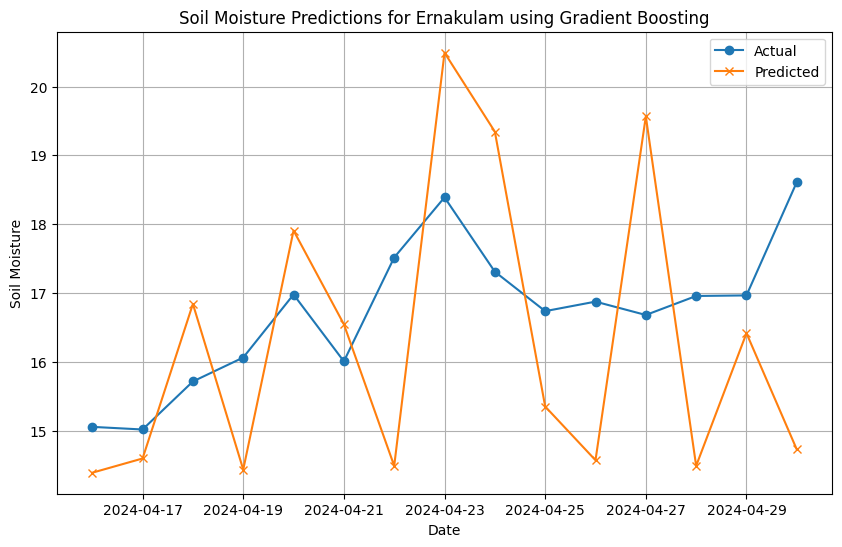

Bayesian Ridge:"Mean Squared Error: 44.413357579910986"
Bayesian Ridge:"Root Mean Squared Error: 6.664334743986903"
Bayesian Ridge:"R^2 Score: -42.87736131764054"


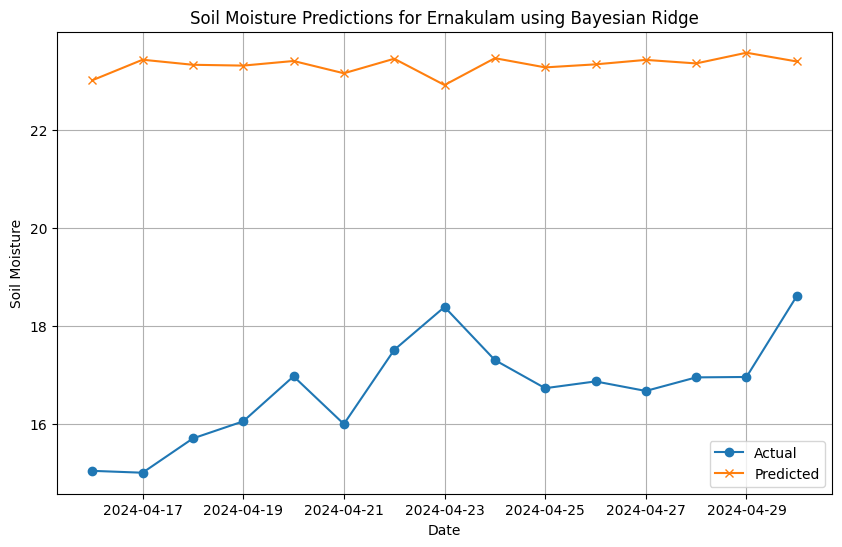

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import BayesianRidge


# create instances of all models
models = {
    'Support Vector Machine': SVR(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bayesian Ridge': BayesianRidge()
    }

for name, model in models.items():
    model.fit(train_features,train_target)
    val_prediciton = model.predict(val_features)
    mse = mean_squared_error(val_target,val_prediciton)
    rmse = np.sqrt(mse)
    r2 = r2_score(val_target,val_prediciton )
    print(f'{name}:"Mean Squared Error: {mse}"')
    print(f'{name}:"Root Mean Squared Error: {rmse}"')
    print(f'{name}:"R^2 Score: {r2}"')
    plt.figure(figsize=(10, 6))
    plt.plot(val_data['Date'], val_target, label='Actual', marker='o')
    plt.plot(val_data['Date'], val_prediciton, label='Predicted', marker='x')
    plt.xlabel('Date')
    plt.ylabel('Soil Moisture')
    plt.title(f'Soil Moisture Predictions for {district_name} using {name}')
    plt.legend()
    plt.grid()
    plt.show()


In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], test_size=0.010, random_state=42)


Support Vector Machine:"Mean Squared Error: 20.502153351613313"
Support Vector Machine:"Root Mean Squared Error: 6.664334743986903"
R^2 Score: 0.34004783106604597


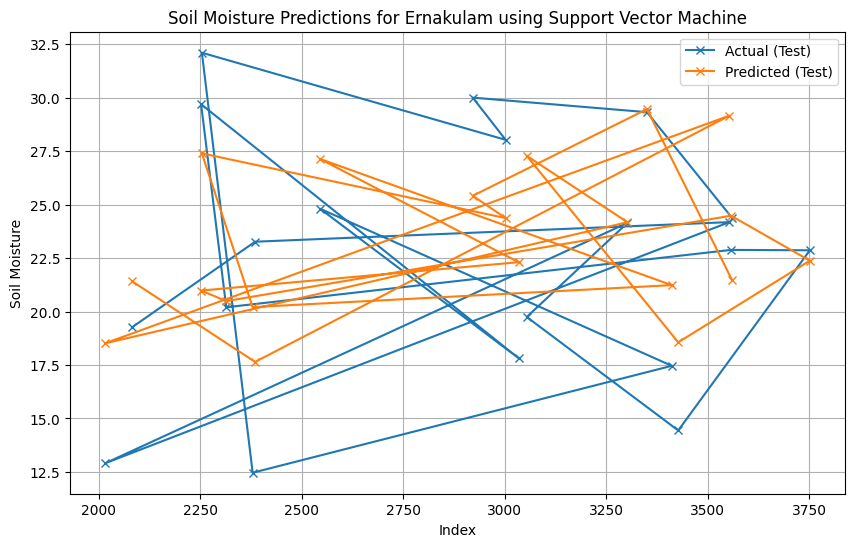

Linear Regression:"Mean Squared Error: 30.786074523576037"
Linear Regression:"Root Mean Squared Error: 6.664334743986903"
R^2 Score: 0.009014501728054736


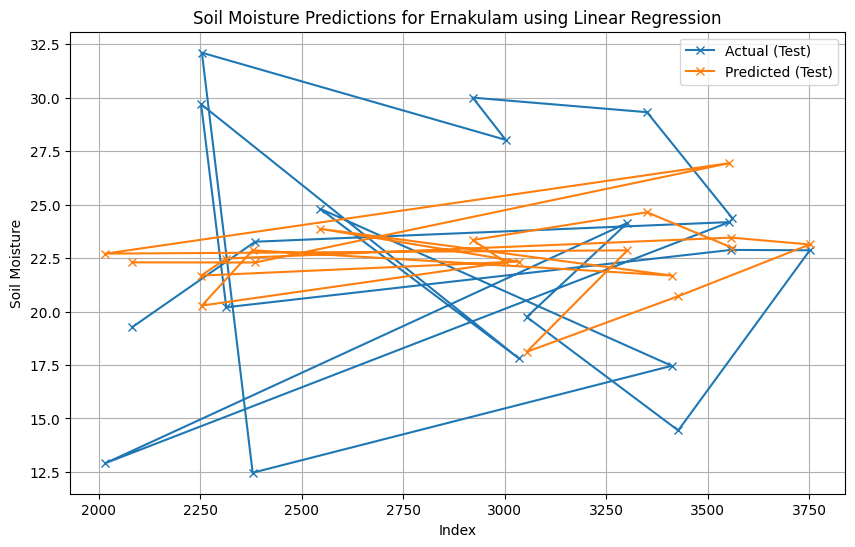

Decision Tree:"Mean Squared Error: 27.79745206401852"
Decision Tree:"Root Mean Squared Error: 6.664334743986903"
R^2 Score: 0.10521648795280947


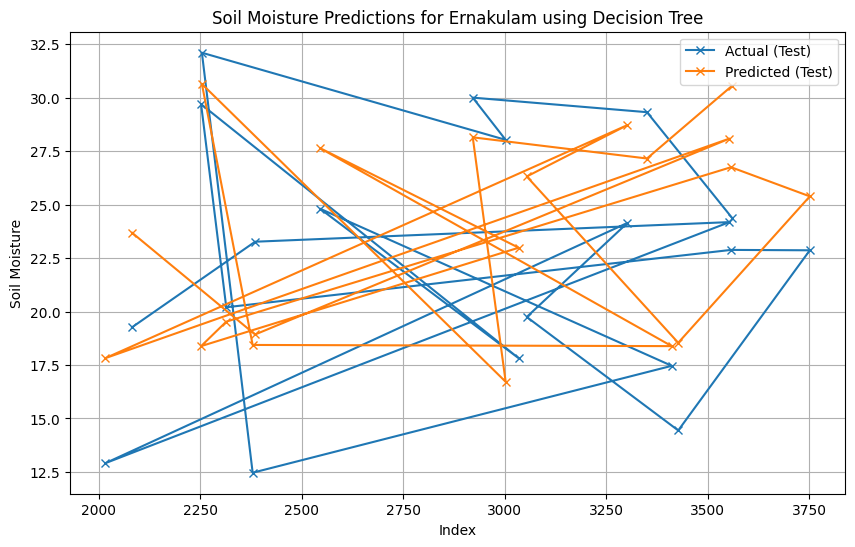

Random Forest:"Mean Squared Error: 28.843030543023485"
Random Forest:"Root Mean Squared Error: 6.664334743986903"
R^2 Score: 0.07155993621524792


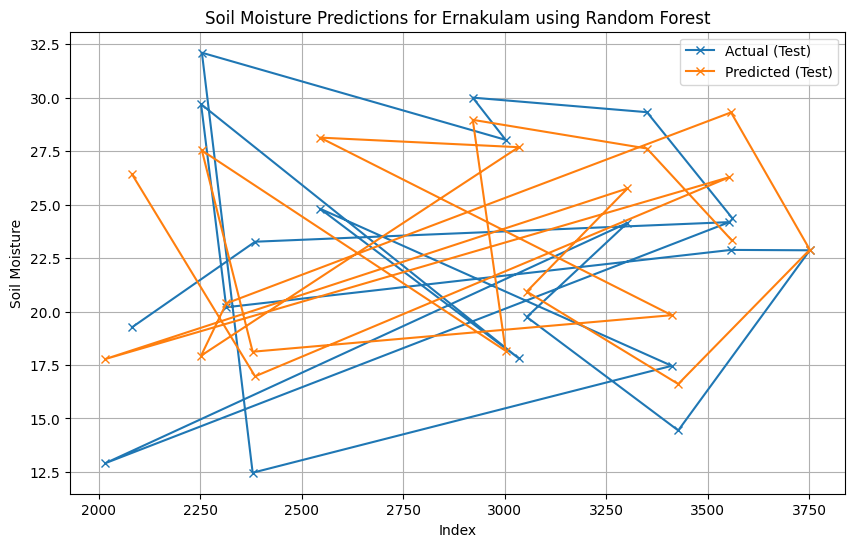

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 1927, number of used features: 4
[LightGBM] [Info] Start training from score 23.776337
LightGBM:"Mean Squared Error: 27.965431295871674"
LightGBM:"Root Mean Squared Error: 6.664334743986903"
R^2 Score: 0.09980933600656638


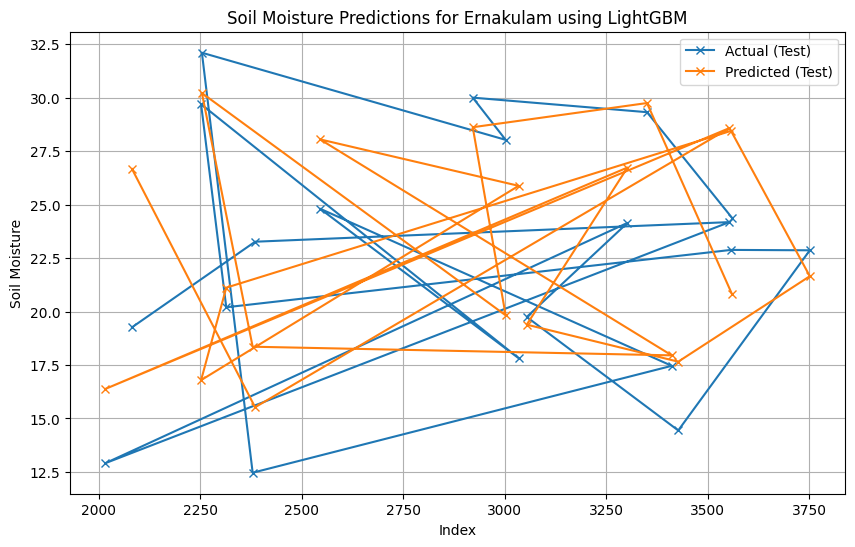

XGBoost:"Mean Squared Error: 27.71748985902471"
XGBoost:"Root Mean Squared Error: 6.664334743986903"
R^2 Score: 0.1077904239542321


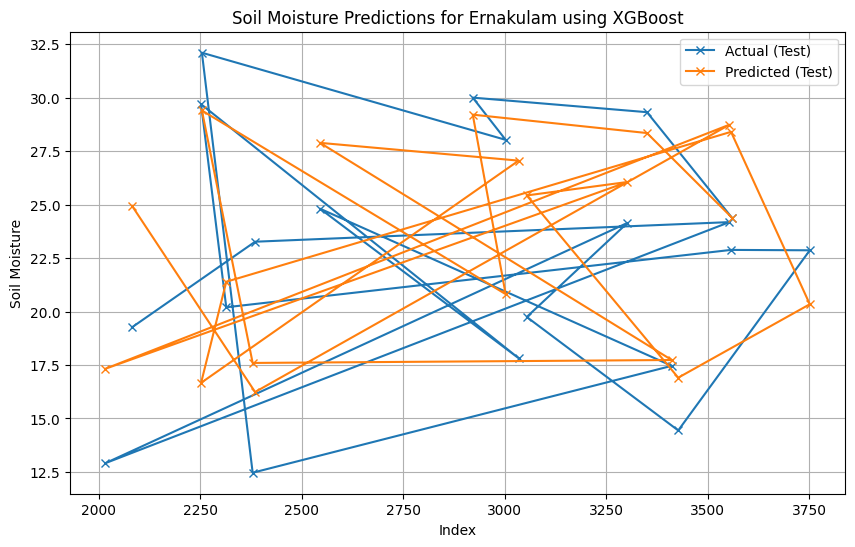

CatBoost:"Mean Squared Error: 24.690893842890837"
CatBoost:"Root Mean Squared Error: 6.664334743986903"
R^2 Score: 0.20521475646597964


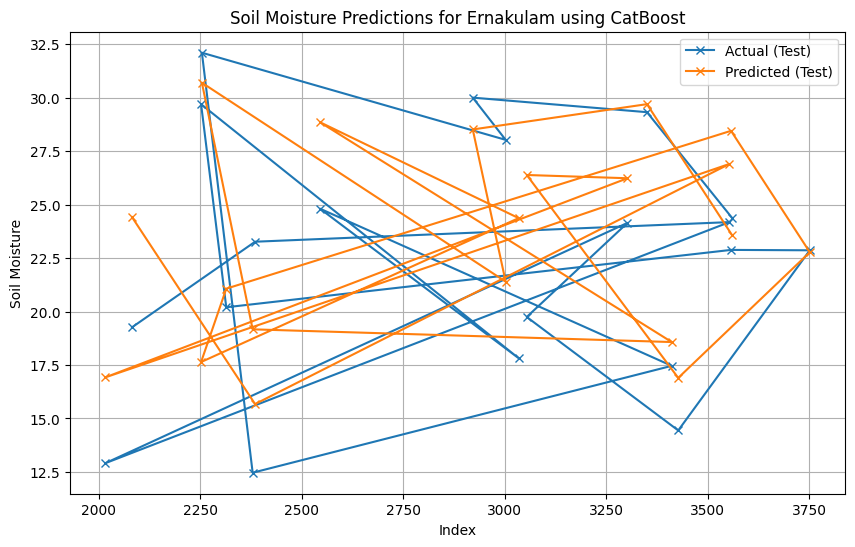

K-Nearest Neighbors:"Mean Squared Error: 30.926813177368075"
K-Nearest Neighbors:"Root Mean Squared Error: 6.664334743986903"
R^2 Score: 0.004484207849651423


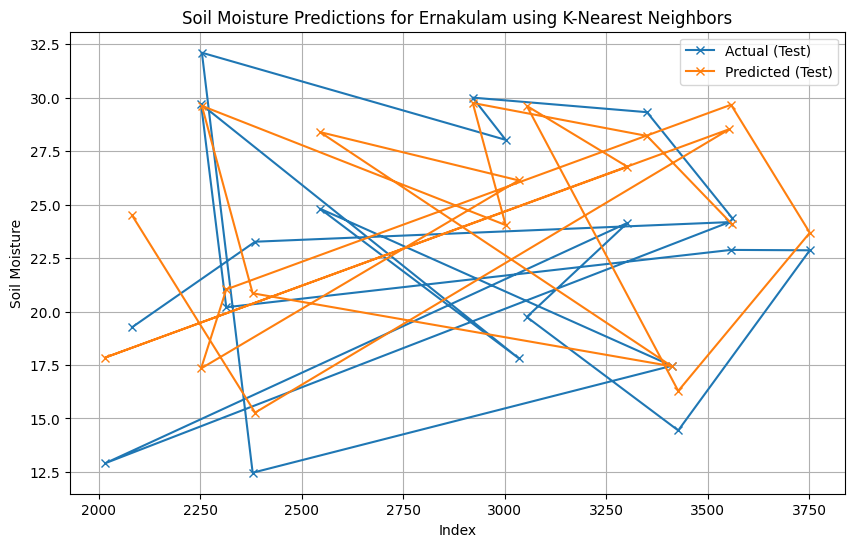

Gradient Boosting:"Mean Squared Error: 21.661995885931486"
Gradient Boosting:"Root Mean Squared Error: 6.664334743986903"
R^2 Score: 0.3027131870890073


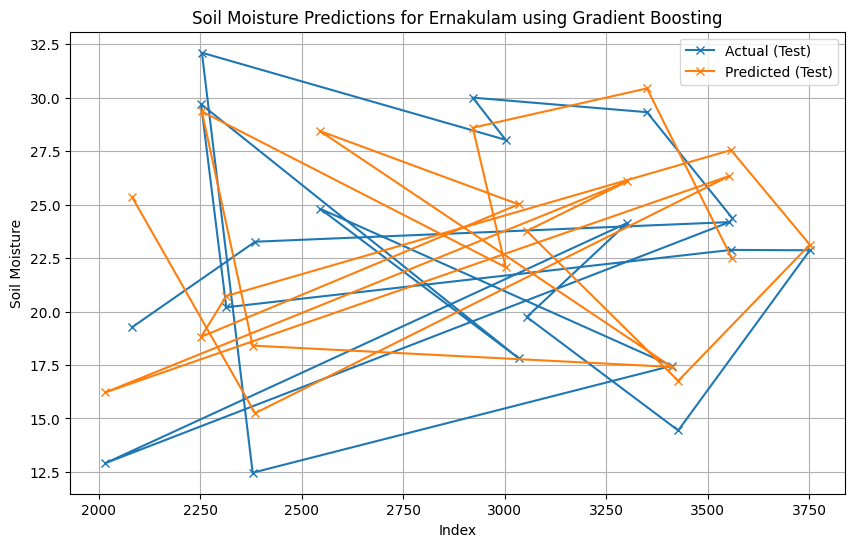

Bayesian Ridge:"Mean Squared Error: 30.238211811029696"
Bayesian Ridge:"Root Mean Squared Error: 6.664334743986903"
R^2 Score: 0.026649877838171743


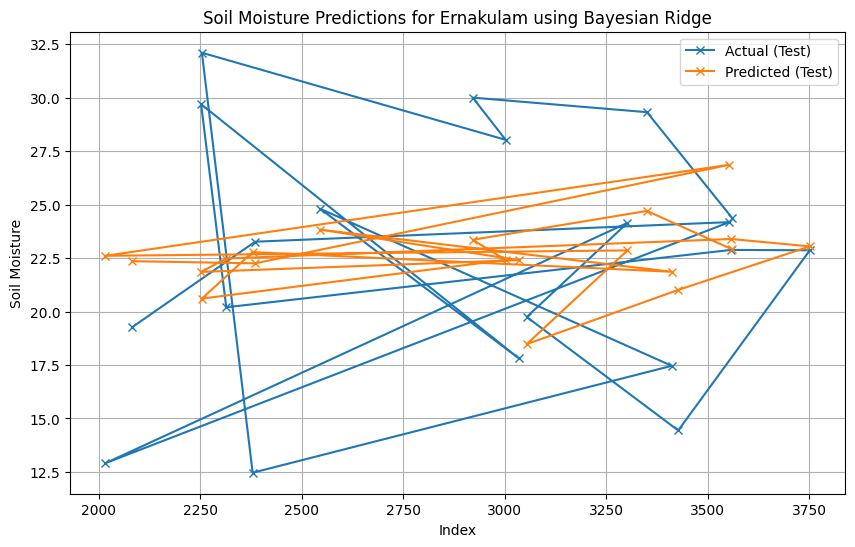

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge


# create instances of all models
models = {
    'Support Vector Machine': SVR(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bayesian Ridge': BayesianRidge()
    }

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:"Mean Squared Error: {mse}"')
    print(f'{name}:"Root Mean Squared Error: {rmse}"')
    print(f"R^2 Score: {r2}")
    plt.figure(figsize=(10, 6))
    #plt.plot(y_train.index, y_train, label='Actual (Train)', marker='o')  # Actual values in training data
    plt.plot(y_test.index, y_test, label='Actual (Test)', marker='x')  # Actual values in test data
    plt.plot(y_test.index, y_pred, label='Predicted (Test)', marker='x')  # Predicted values for test data

    plt.xlabel('Index')
    plt.ylabel('Soil Moisture')
    plt.title(f'Soil Moisture Predictions for {district_name} using {name}')
    plt.legend()
    plt.grid()
    plt.show()
